## 머신러닝
### 1번 군집분석
#### 다음은 온라인 유통회사 A사의 고객의 물품 구매 정보에 대한 데이터이다. A 회사는 RMF(Recency, Monetary, Frequency) 중에서 F와 M를 기준으로 고객 군집 분석을 시행하고자 한다. 다음 물음에 답하시오.

데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [78]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,9/14/2011 15:48,9.95,14911.0,EIRE


#### 1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성하시오.

In [85]:
def buy_count(x):
    if x > 0:
        return 1
    return -1

tmp_df = df1.copy()
tmp_df['M'] = tmp_df['Quantity'] * tmp_df['UnitPrice']
tmp_df['F'] = tmp_df['Quantity'].apply(lambda x: buy_count(x))
tmp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,M,F
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE,27.04,1
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France,11.70,1
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany,23.40,1
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France,30.00,1
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany,19.80,1
...,...,...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany,7.80,1
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE,15.60,1
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France,13.00,1
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,9/14/2011 15:48,9.95,14911.0,EIRE,-9.95,-1


In [56]:
grouped = tmp_df.groupby('CustomerID').sum()
grouped

,Quantity,UnitPrice,M,F
CustomerID,,,,
12348.0,2341,178.71,1797.24,31
12349.0,631,605.10,1757.55,73
12350.0,197,65.30,334.40,17
12352.0,470,2211.10,1545.41,75
12354.0,530,261.22,1079.40,58
...,...,...,...,...
14935.0,935,26.22,1784.71,10
14936.0,4083,1358.79,8117.42,362
14937.0,483,119.85,1617.63,33


#### 1.2 새로 생성된 데이터를 기준으로 EDA를 진행하고 이상치를 제거하고, 필요하다면 다른 전처리를 수행하시오.

<AxesSubplot:xlabel='CustomerID'>

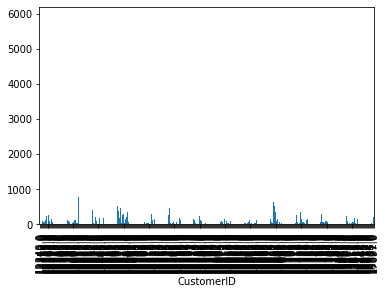

In [66]:
import seaborn as sns



In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41024 non-null  object 
 1   StockCode    41024 non-null  object 
 2   Description  41024 non-null  object 
 3   Quantity     41024 non-null  int64  
 4   InvoiceDate  41024 non-null  object 
 5   UnitPrice    41024 non-null  float64
 6   CustomerID   41024 non-null  float64
 7   Country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


데이터는 구매 시간이라는 시계열 피쳐가 존재
- F(소비자별 구매 빈도), M(소비자별 총 구매액)을 시간 순으로 누적합하여 시계열의 특성을 반영 및 InvoiceDate 제거
- 국가는 원핫 인코딩을 통해 구별
- 과적합을 막기 위해 라벨 데이터인 InvoiceNo, StockCode, CustomerID 제거
- Description은 워드 임베딩을 통해 정보를 살릴 수 있으나 큰 정보가 없다고 판단하여 제거

In [86]:
tmp_df['InvoiceDate'] = pd.to_datetime(tmp_df['InvoiceDate'])

tmp_df = tmp_df.sort_values('InvoiceDate')
tmp_df['M_cum'] = tmp_df.groupby('CustomerID')['M'].cumsum()
tmp_df['F_cum'] = tmp_df.groupby('CustomerID')['F'].cumsum()

In [88]:
df1['M_cum'] = tmp_df['M_cum']
df1['F_cum'] = tmp_df['F_cum']

In [90]:
onehot = {value:idx for idx, value in enumerate(df1['Country'].unique())}

df1['Country'] = df1['Country'].apply(lambda x: onehot[x])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,M_cum,F_cum
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,0,71176.25,2788
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,1,7085.84,305
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,2,6672.94,312
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,1,3932.40,136
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,2,1255.66,55
...,...,...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,2,657.78,41
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,0,56563.10,2273
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,1,4708.86,259
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,9/14/2011 15:48,9.95,14911.0,0,72810.47,2882


In [94]:
df1 = df1.sort_values('InvoiceDate')
final_df = df1[['Quantity', 'UnitPrice', 'Country', 'M_cum', 'F_cum']]
final_df = final_df.reset_index().drop('index', axis=1)
final_df

,Quantity,UnitPrice,Country,M_cum,F_cum
8769,24,0.19,2,31.56,4
27433,20,1.65,2,215.99,12
11619,3,18.00,2,320.39,15
32221,24,0.19,2,27.00,3
28544,10,1.65,2,140.87,9
...,...,...,...,...,...
2170,4,3.75,7,2045.92,98
19159,12,1.25,7,2638.36,128
4650,4,8.50,7,2623.36,127
16256,12,2.10,7,2086.12,100


#### 1.3 적합한 군집분석 알고리즘을 선택하고 시행한 후, 시행 결과에 대해 응집도와 분리도 관점에서 평가하시오.

In [99]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# KMeans 클러스터링 알고리즘 적용
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(final_df)

# 실루엣 점수 계산
silhouette = silhouette_score(final_df, y_km)

print('Silhouette score: ', silhouette)

Silhouette score:  0.8637544296422551


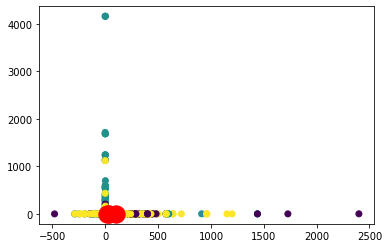

In [103]:
# 클러스터링 결과 시각화
plt.scatter(final_df.iloc[:, 0], final_df.iloc[:, 1], c=km.labels_, cmap='viridis')

# 클러스터 중심 표시
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red')

plt.show()

#### 1.4 각 군집별 특성에 대한 의견과 비즈니스적 인사이트를 제시하시오

### 2번 시계열분석

#### 데이터 설명
- 각 raw는 관광지 A의 1990년 1월 부터 25년동안의 매달 평균 이용객 숫자이다.

In [2]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem2.csv'
encoded_url2 = urllib.parse.quote(url2, safe=':/')

response2 = urllib.request.urlopen(encoded_url2, context=context)
df2 = pd.read_csv(response2, encoding='utf-8', index_col=0)
df2

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5
...,...
295,445.2
296,472.0
297,341.6
298,477.8


#### 2-1 EDA와 시각화를 진행하라

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   counts  295 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [4]:
df2.describe()

,counts
count,295.000000
mean,498.678305
std,97.603920
min,239.400000
25%,432.600000
50%,499.800000
75%,565.550000
max,729.200000


<AxesSubplot:>

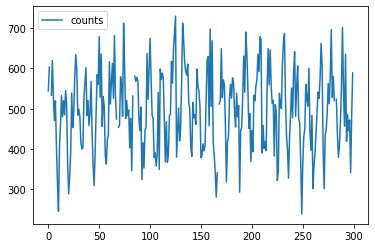

In [5]:
df2.plot()

#### 2-2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라
해당 시계열은 정상성을 만족하고, 계절성을 가지고 있으므로 전년 or 후년 동기 값을 이용하여 대체한다.

In [6]:
df2[df2['counts'].isna()]

,counts
2,NaN
68,NaN
84,NaN
167,NaN
282,NaN


In [7]:
df2.iloc[2] = df2.iloc[2 + 12]
df2.iloc[68] = df2.iloc[68 - 12]
df2.iloc[84] = df2.iloc[84 - 12]
df2.iloc[167] = df2.iloc[167 - 12]
df2.iloc[282] = df2.iloc[282 - 12]

#### 2-3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

In [8]:
dates = pd.date_range('1990-01-01', periods=300, freq='1M')
print(dates)

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', length=300, freq='M')


In [9]:
df2.index = dates
df2.head(), df2.tail()

(            counts
 1990-01-31   544.3
 1990-02-28   603.1
 1990-03-31   480.0
 1990-04-30   533.4
 1990-05-31   619.5,             counts
 2014-08-31   445.2
 2014-09-30   472.0
 2014-10-31   341.6
 2014-11-30   477.8
 2014-12-31   588.8)

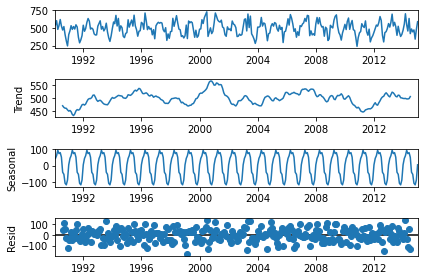

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2)
result.plot()
plt.show()

In [11]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA 모델의 파라미터 범위를 설정합니다.
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# AIC를 최소화하는 파라미터를 찾습니다.
lowest_aic = float('inf')
best_pdq = best_seasonal_pdq = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(df2,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=True,
                            enforce_invertibility=True)
            results = model.fit()
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f'Best SARIMA parameters: {best_pdq}x{best_seasonal_pdq}')

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

Best SARIMA parameters: (0, 1, 1)x(2, 0, 1, 12)


In [14]:
df2_pred = df2.copy()
model = SARIMAX(df2, order=(1, 0, 1), seasonal_order=(2, 0, 1, 12))
model_fit = model.fit(disp=False)

# 예측 결과를 시각화합니다.
df2_pred['forecast'] = model_fit.predict(start = pd.to_datetime('1990-01-31'), end= pd.to_datetime('2014-12-31'))
df2_pred.head()

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


,counts,forecast
1990-01-31,544.3,0.000000
1990-02-28,603.1,313.139022
1990-03-31,480.0,418.918831
1990-04-30,533.4,435.046933
1990-05-31,619.5,455.701811


<AxesSubplot:>

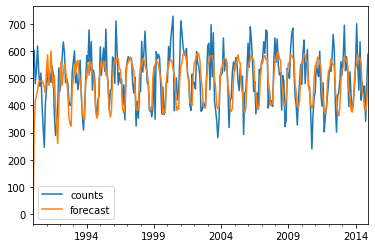

In [19]:
df2_pred.plot()

In [17]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(df2_pred['counts'], df2_pred['forecast']))

6341.093608949783


#### 2-4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

해당 시계열 모델은 대략적인 추세를 설명하는 모델이므로 장기적인 계획을 세울 때 대략적인 예측을 위해서 사용할 수 있다.

하지만 단기적인 변화(오차)에 의해 결과값이 달라질 수 있으므로 그때그때의 상황을 반영해야 더욱 정확해진다.

## 통계
### 3. 기본 통계 및 확률 문제

#### 3-1 서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [17]:
# 조화평균
def harmony_mean(x, y):
    return round(1 / (((1/x) + (1/y)) / 2), 2)

avg = harmony_mean(100, 80)

print(f'평균속도 : {avg}km/h')

평균속도 : 88.89km/h


#### 3-2 이전의 연매출이 3000이고 올해의 연매출이 4000, 내년의 연매출이 5000으로 늘어날 예정이라면 연평균 몇배가 증가한 것인가?

In [21]:
s1 = 1 + ((4000 - 3000) / 3000)
s2 = 1 + ((5000 - 4000) / 4000)

sales = round((s1 * s2) ** (1/2), 2)

print(f'연평균 {sales}배 증가')

연평균 1.29배 증가


#### 3-3 남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/98463d13-fa90-455b-a03c-a21701652dc1">

In [23]:
print(round((20 / (20 + 10)) * 100, 2), '%')

66.67 %


#### 3-4 표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정하라

In [2]:
import scipy.stats as stats

n = 10
s2 = 90
alpha = 0.05

confidence_interval = ((n-1)*s2 / stats.chi2.ppf(1 - alpha / 2, n-1), (n-1)*s2 / stats.chi2.ppf(alpha / 2, n-1))

print(confidence_interval)

(42.58055444790953, 299.95672846672363)


### 4번 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%이고 혈압약 투약 이전과 이후의 차이가 존재하는지 확인하려한다.

#### 4-1 귀무가설과 연구가설을 제시하시오

- H0 : 혈압약 투약 이전과 이후의 차이가 존재하지 않는다.
- H1 : 혈압약 투약 이전과 이후의 차이가 존재한다.

#### 4-2 검정 후 귀무가설 기각 여부 제시

In [52]:
from scipy.stats import t

n = 20
df = n - 1
alpha = 0.05

d0 = 0
d = 24
d_std = 9
SE = d_std / (n**(1/2))
tstat = (d - d0) / SE
test_t = t.ppf(1-alpha/2, df)

sp = (1 - t.cdf(abs(tstat), df)) * 2
cv = t.ppf(1-0.05/2, df)

print('유의확률', round(sp, 2))
print('귀무가설 기각')

유의확률 0.0


### 5번 공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

In [42]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem5.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response3 = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response3, encoding='utf-8', names = ['time', 'factory', 'rank'], header=0)
df3

,time,factory,rank
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1
5,64,Z,6
6,58,Y,2
7,71,Z,12
8,76,Y,14
9,67,Y,8


,time,factory,rank
1,75,X,14
2,71,X,12
4,50,X,1
10,70,X,11
18,64,X,8
19,65,X,9
25,63,X,7
26,56,X,4
27,58,X,5
29,79,X,15


#### 5-1. 연구가설과 귀무가설을 설정하시오

- H0 : 세 공장의 중위수 차이가 없다.
- H1 : 세 공장의 중위수 차이가 존재한다.

#### 5-2. 검정통계량을 구하고 가설을 채택하시오

귀무가설을 채택, 세 공장의 중위수 차이는 없다.

In [50]:
from scipy.stats import kruskal

x = df3[df3['factory'] == 'X']
y = df3[df3['factory'] == 'Y']
z = df3[df3['factory'] == 'Z']

stat, p = kruskal(x['rank'], y['rank'], z['rank'], nan_policy='omit')
print(f'검정 통계량 : {stat}, p-value : {p}')

검정 통계량 : 0.1249463430741201, p-value : 0.9394382661600987


### 6번 다음은 A사의 투자 방안에 대한 표이다. 3년동안의 1~5안의 투자금액을 참고하여 1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오.

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/33f192c2-1103-4f88-ae36-f1ed0fbb9e18">

In [29]:
invest = {
    0 : [24, 24, 13, 31],
    1 : [16, 15, 11, 20],
    2 : [17, 25, 12, 31],
    3 : [14, 13, 15, 22],
    4 : [25, 23, 15, 43]
}
budget = [50, 60, 70]

cases = []
def dfs(n, case=[]):
    if len(case) == n:
        cases.append(case[:])
        return

    for i in range(5):
        if len(case) > 0 and case[-1] >= i:
            continue
        dfs(n, case + [i])

for n in range(1, 6):
    dfs(n)

npv = 0
for case in cases:
    b = budget[:]
    is_success = True
    new_npv = 0
    for c in case:
        for i in range(3):
            b[i] -= invest[c][i]
            if b[i] < 0:
                is_success = False
                break
            new_npv += invest[c][i]
        
    if is_success:
        if npv < new_npv:
            npv = max(npv, new_npv)
            invest_case = case[:]

npv, invest_case

(138, [1, 2, 3])